# STOCK PRICE PREDICTION

## 1.Data Collection:-

### Importing the Libraries

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading CSV file from file location Dataset

In [132]:
df=pd.read_csv('NFLX.csv')

### checking overview of 1st few row data values

In [133]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [134]:
df.shape

(1007, 7)

### Statistics:

In [135]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,125.779999,127.165001,124.355000,125.514999,125.514999,5.573200e+06
50%,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07
max,421.380005,423.209991,413.079987,418.970001,418.970001,5.841040e+07


## 2.Data Preprocessing:-

### Supress Warnings

In [136]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


### Dropping the object data set column

In [138]:
df=df.drop(['Date'], axis=1)

### Checking Null values

In [139]:
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

### Outlier Analysis

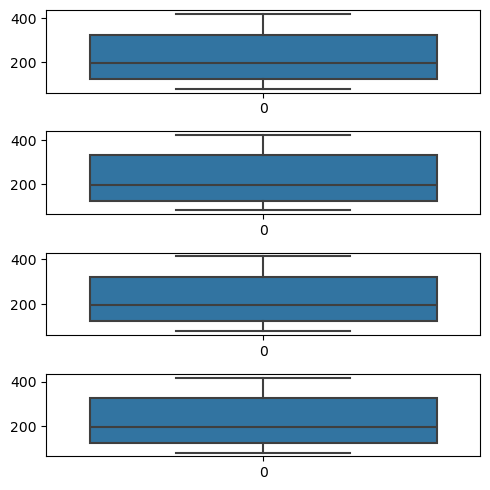

In [140]:
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['Open'], ax = axs[0])
plt2 = sns.boxplot(df['High'], ax = axs[1])
plt3 = sns.boxplot(df['Low'], ax = axs[2])
plt4 = sns.boxplot(df['Close'], ax = axs[3])
plt.tight_layout()

## 3.Data Analysis:-

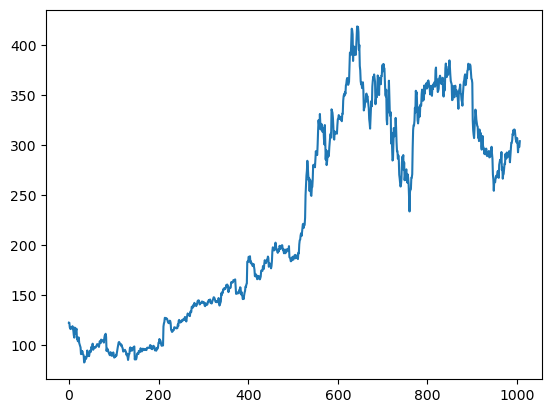

In [141]:
plt.plot(df['Close'])

### Checking the correlation:

In [142]:
print(df.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999489  0.999333  0.998712   0.998712 -0.095059
High       0.999489  1.000000  0.999264  0.999438   0.999438 -0.084998
Low        0.999333  0.999264  1.000000  0.999448   0.999448 -0.107404
Close      0.998712  0.999438  0.999448  1.000000   1.000000 -0.095180
Adj Close  0.998712  0.999438  0.999448  1.000000   1.000000 -0.095180
Volume    -0.095059 -0.084998 -0.107404 -0.095180  -0.095180  1.000000


### Visualization of correlation using Heatmap 

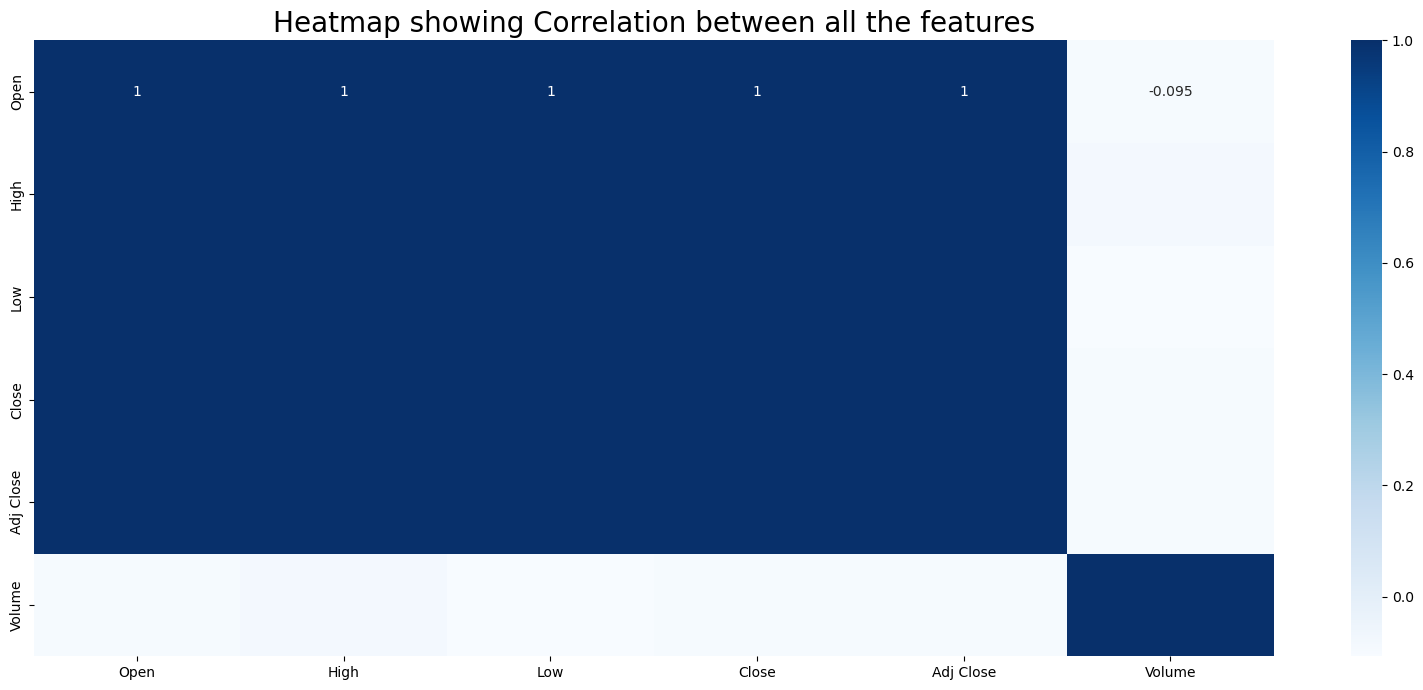

In [143]:
plt.figure(figsize=(20,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True,cmap='Blues')
plt.show()
#Shows the strong correlation

## 4.Exploratory Data Analysis(EDA):-

## Overview of relationships in Dataset

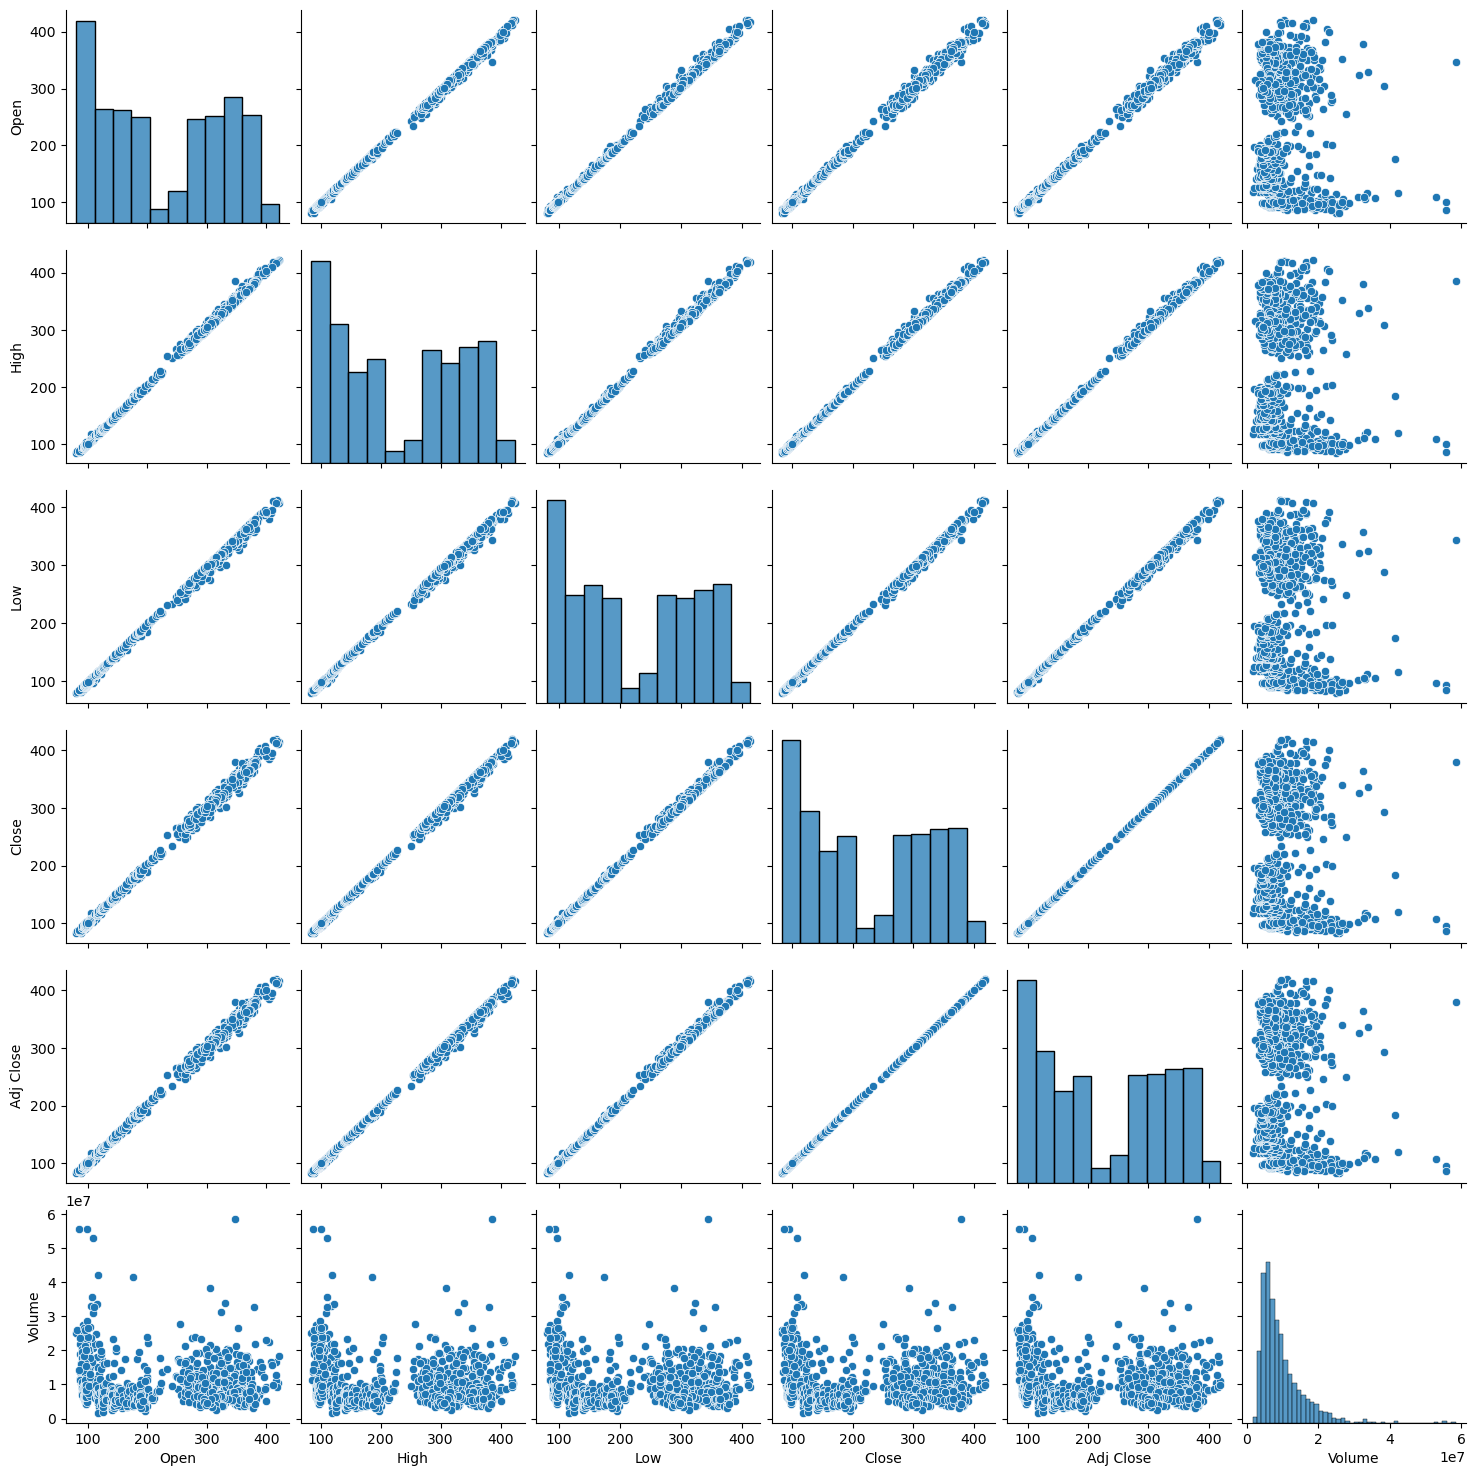

In [144]:
sns.pairplot(df)

### Analysing Histograms

<Axes: >

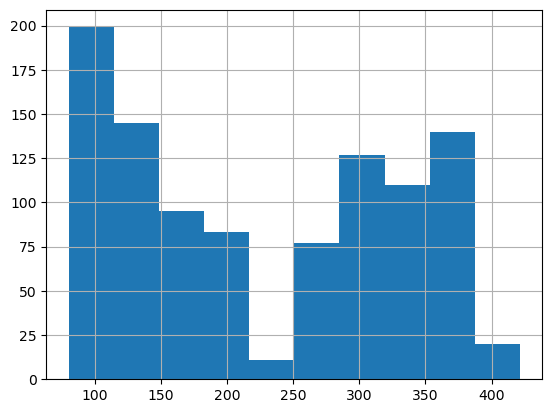

In [145]:
df['Open'].hist()

<Axes: >

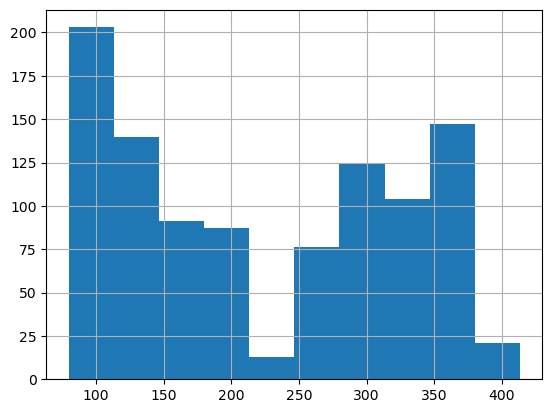

In [146]:
df['Low'].hist()

<Axes: >

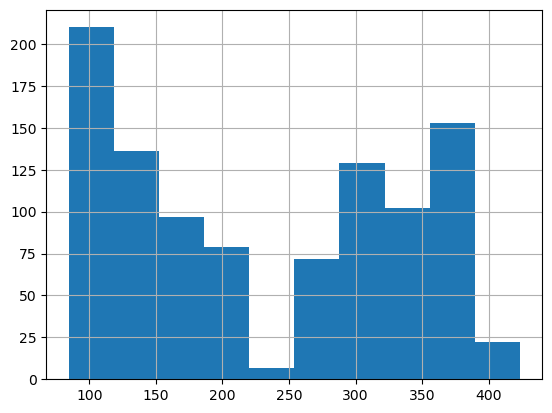

In [147]:
df['High'].hist()

<Axes: >

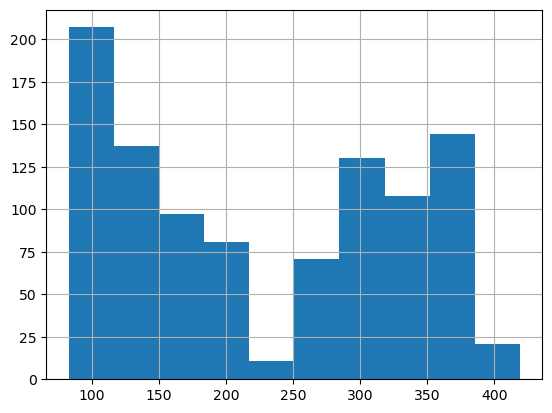

In [148]:
df['Close'].hist()

<Axes: >

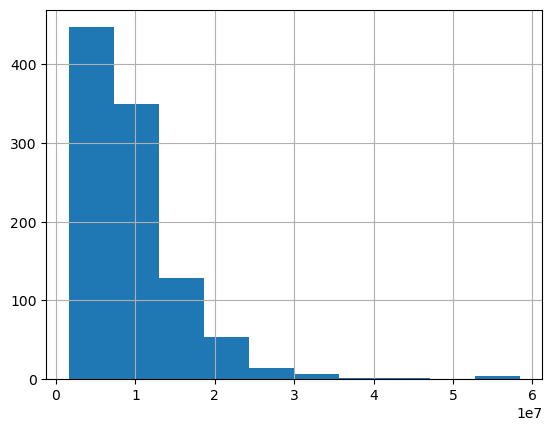

In [149]:
df['Volume'].hist()

## 5.Feature Engineering:-

### Splitting the columns into dependent variable (X) and independent variable (y)

In [150]:
X=df[['Open','High','Low','Volume']].values
y=df['Close']

### 80% for training and 20% for testing

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 6.Model Building:-

### Training the Model using Linear Regression

In [152]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

### To make predictions

In [153]:
y_pred=lr.predict(X_test)

### Print the intercept and coefficients

In [154]:
print(lr.intercept_)
print(lr.coef_)

-0.14345154416596984
[-6.35986526e-01  8.58164998e-01  7.77624279e-01  1.92190143e-08]


### Predcition Table for actual prices and predicted prices

In [155]:
dframe=pd.DataFrame(y_test,y_pred)
dfr=pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':y_pred})
print(dfr)

     Actual_Price  Predicted_Price
799    356.970001       357.572873
311    143.190002       142.204825
85      96.769997        96.021836
435    176.419998       178.313648
204    104.820000       105.810663
..            ...              ...
814    358.820007       361.386725
231    113.589996       114.987895
5      118.160004       117.459944
452    179.190002       179.229034
683    363.600006       364.417194

[202 rows x 2 columns]


### Statistics on Actual Price and Predicted price

In [156]:
dfr.describe()

,Actual_Price,Predicted_Price
count,202.000000,202.000000
mean,230.695396,230.881199
std,98.042308,97.981634
min,82.790001,84.231889
25%,142.270000,142.140306
50%,198.924995,200.530009
75%,326.444992,325.504536
max,408.250000,405.504616


## 7.Model Accuracy

In [157]:
xx=abs(y_pred-y_test)
yy=100*(xx/y_test)
accuracy=100-np.mean(yy)
print('Accuracy:',round(accuracy,2),'%.')

Accuracy: 99.37 %.


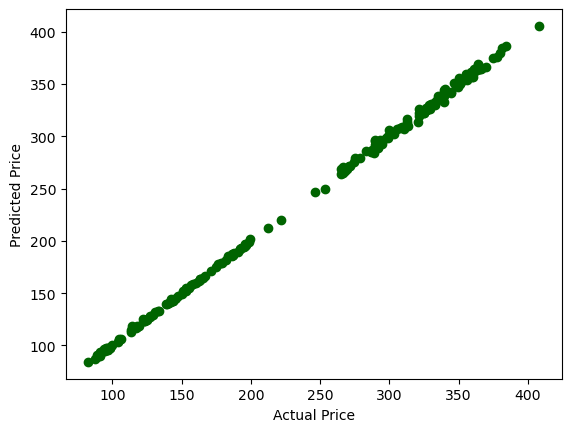

In [158]:
plt.scatter(dfr.Actual_Price,dfr.Predicted_Price,color='Darkgreen')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

### Plotting the graph of 1st 20 values

<Axes: >

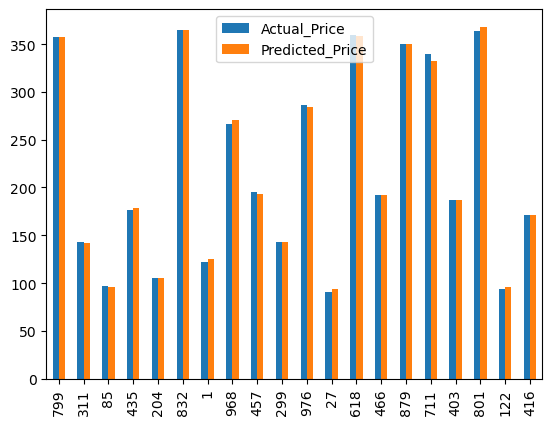

In [159]:
graph=dfr.head(20)
graph.plot(kind='bar')

#                                                END